![innomatics-footer-logo.png](attachment:782c36e9-d4ef-4195-b012-a8200d1e57c4.png)

# 😊 Emotion Detection from Text

![ubicompiswc21adjunct-79-fig1.jpg](attachment:8264a016-6691-44f1-bc1e-f1396c52bc57.jpg)

## 📌 1. Business and Data Understanding

### 📍 a) Business Problem: Emotion Detection Using AI 🤖🎭

In an era driven by data & emotions, understanding human sentiments from text is game-changing! 🚀
Imagine an AI that "feels" what you're saying—here's how it helps:

🔹 🤝 **Customer Support** – Detects sentiment in reviews & chat conversations to enhance customer experience.
🔹 🧠 **Mental Health Monitoring** – Identifies distress patterns, helping professionals offer timely support.
🔹 📢 **Marketing & Brand Monitoring** – Deciphers customer emotions for product success & brand strategies.
🔹 📊 **Social Media & Content Analysis** – Tracks public opinion trends, predicting viral moments!

---

### 📍 b) Business Objective 🎯

We aim to craft an AI-powered emotion detection model that:

✅ **Understands emotions** like joy, anger, sadness & more from text!
✅ **Delivers High Accuracy** – so it’s trustworthy & reliable.
✅ **Runs Efficiently in Real-time** – for instant insights! ⏳
✅ **Is Business-Friendly** – providing clear & actionable insights!

💡 Think of it as an **AI psychologist for text!** 🧐📜

---

### 📍 c) Business Constraints ⚖️

To build a rock-solid model, we must tackle:

🚀 **Speed vs. Accuracy** – It must be fast & precise!
🔐 **Data Privacy & Compliance** – Emotions are personal; we ensure ethical handling.
📈 **Scalability** – It should handle millions of texts without breaking a sweat! 💪
⚖️ **Bias & Fairness** – A fair AI that doesn't misinterpret emotions based on gender, culture, or tone.

---

### 📍 d) Data Understanding 📊

Our AI learns from real-world emotions using massive datasets!

🗂️ **Dataset Size**: 422,746 text samples – A rich emotional spectrum! 🌈

📌 **Key Columns**:
- 📝 **sentence** – The text we analyze (e.g., *"I'm thrilled about my promotion!"* 🥳)
- 🎭 **emotion** – The AI’s prediction (e.g., *"Joy"* 😊, *"Sadness"* 😢, *"Anger"* 😠)

💡 **More data = Smarter AI!** 🤖📚


# Importing the libraries

In [3]:
import pandas as pd
import  seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# Importing the Data

In [4]:
df=pd.read_csv(r"/content/combined_emotion.csv")

In [5]:
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


In [6]:
df['emotion'].unique()

array(['fear', 'sad', 'love', 'joy', 'suprise', 'anger', nan],
      dtype=object)

<Axes: xlabel='emotion'>

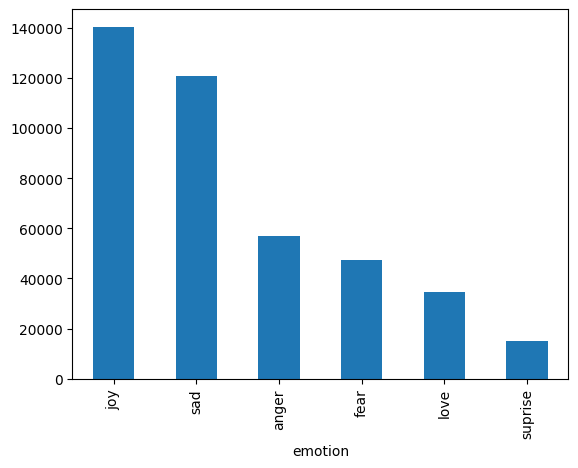

In [7]:
df['emotion'].value_counts().plot(kind='bar')

In [8]:
text =' '.join(df['sentence'].values)

In [9]:
#pip install wordcloud

In [10]:
#pip install matplotlib

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
cloud = WordCloud()

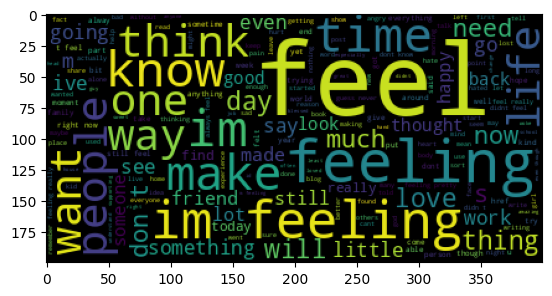

In [13]:
data = cloud.generate_from_text(text)
plt.imshow(data)

In [14]:
X = df['sentence']
y = df['emotion']

In [15]:
model = Pipeline([("BOW",CountVectorizer(stop_words='english')),
         ("Algorithm",MultinomialNB(alpha=1.0))])

In [16]:
model

Pipeline(steps=[('BOW', CountVectorizer(stop_words='english')),
                ('Algorithm', MultinomialNB())])

In [18]:
# Handle NaN values in 'sentence' and 'emotion' columns
df = df.dropna(subset=['sentence', 'emotion'])

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Now proceed with feature extraction and model fitting
X = df['sentence']
y = df['emotion']
model = Pipeline([("BOW",CountVectorizer(stop_words='english')),
         ("Algorithm",MultinomialNB(alpha=1.0))])
model.fit(X,y)

Pipeline(steps=[('BOW', CountVectorizer(stop_words='english')),
                ('Algorithm', MultinomialNB())])

In [19]:
model.predict(['Congrats'])

array(['joy'], dtype='<U7')

In [20]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('BOW', CountVectorizer(stop_words='english')),
                ('Algorithm', MultinomialNB())])

In [22]:
# Evaluate on the test set
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()

In [23]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [24]:
from sklearn.metrics import f1_score

# Compute F1-score (weighted for class imbalance)
f1 = f1_score(y_test, y_pred, average="weighted")

# Return both accuracy and F1-score
accuracy, f1

(0.8656910725909497, 0.8602565842893588)

In [25]:
import os
import pickle

In [26]:
model_filename = "emotion_detection_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump((vectorizer, model), file)

print(f"✅ Model saved as {model_filename}")

✅ Model saved as emotion_detection_model.pkl


In [27]:
import os
print(os.getcwd())  # Check your current directory

/content


In [28]:
text_input = ["I am feeling very happy today!"]

# Ensure pipeline loads and works
predicted_emotion = model.predict(text_input)

print(f"Predicted Emotion: {predicted_emotion[0]}")


Predicted Emotion: joy
